**泛化能力** 是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。获得泛化能力是机器学习的最终目标。

以下如果未说明, log一般指的是ln. 

#### **损失函数**

In [1]:
# 均方误差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
# 例子
import numpy as np

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
mean_squared_error(y, t)

np.float64(0.09750000000000003)

In [4]:
# 交叉熵误差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
    # 作为保护性对策，添加一个微小值可以防止负无限大的发生。

In [5]:
np.log(0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17896\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [6]:
cross_entropy_error(y, t)

np.float64(0.510825457099338)

为了量化一个信号包含信息的多少，我们定义一个随机变量的事件 ${\rm X} = x$ 的**自信息**（self-information）为

$$I(x) = -\log P(x)$$
其中 $P(x)$ 表示 ${\rm X} = x$ 的概率。若 $\log$ 使用 $e$ 为底数，$I(x)$的单位为奈特；若使用 2 为底数，$I(x)$的单位为**比特**(bit)。

信息量满足以下三条性质：
- 非常可能发生的事件信息量要比较少，并且极端情况下，一定能够发生的事件应该没有信息量。
- 较不可能发生的事件具有更高的信息量。
- 独立事件应具有增量的信息。例如，投掷的硬币两次正面朝上传递的信息量，
应该是投掷一次硬币正面朝上的信息量的两倍。

自信息只处理单个的输出，我们可以用**香农熵**（Shannon entropy）来对整个概率分布中的不确定性总量进行量化：
$$H(P)=\mathbb{E}_{{\rm x}\sim P}[I(x)]=-\mathbb{E}_{{\rm x}\sim P}[\log P(x)]$$
熵的本质是一个系统内在的混乱程度。换言之，一个分布的香农熵是指遵循这个分布的事件所产生的期望信息总量。它给出了对依据概率分布 $P$ 生成的符号进行编码所需的比特数在平均意义上的下界。那些接近确定性的分布(输出几乎可以确定) 具有较低的熵；那些接近均匀分布的概率分布具有较高的熵。

例如，下图为服从伯努利分布的随机变量的香农熵，图中水平轴是二值随机变量等于 1 的概率 $p$。因此，$H({\rm x})=-(1-p)\log(1-p)-p\log(p)$

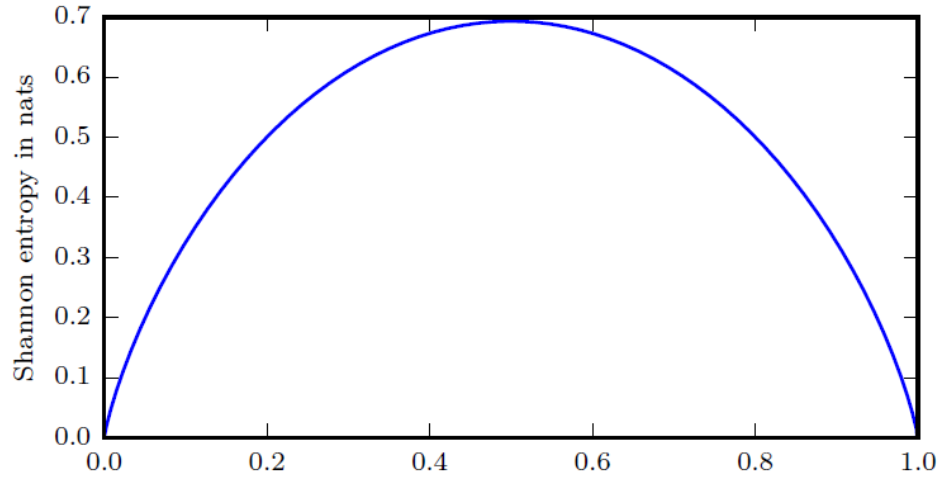

该图说明了更接近确定性的分布具有较低的香农熵，而更接近均匀分布的分布具有较高的香农熵。

如果我们对于同一个随机变量 ${\rm x}$ 有两个单独的概率分布 $P(x)$ 和 $Q(x)$，我们可以使用 **KL散度**（Kullback-Leibler (KL) divergence）来衡量这两个分布的差异：

$$ D_{KL}(P||Q)=\mathbb{E}_{{\rm x}\sim P}\left[\log\frac{P(x)}{Q(x)}\right]=\mathbb{E}_{{\rm x}\sim P}[\log P(x)-\log Q(x)] $$

在离散型变量的情况下，KL散度衡量的是，KL散度表示用分布$Q$近似真实分布$P$时, 额外需要的平均信息量（单位为纳特，若以$log_2$计算则为比特）. 

KL散度的性质：

- 非负(利用对数函数的性质$\log (y)\leq y-1$, 且当$y > 0$时, 等号成立当且仅当$y=1$)，当且仅当 $P$ 和 $Q$ 为相同分布时为零

因为 KL散度是非负的并且衡量的是两个分布之间的差异，它经常被用作分布之间的某种距离。

- 不对称
$$ D_{KL}(P||Q)\neq D_{KL}(Q||P)$$

在机器学习算法中，KL散度可以用来评估模型输出和标签之间的差距。KL散度是理解分布差异的重要工具，但其非对称性和对零概率的敏感性需在实际应用中谨慎处理。

- 与交叉熵的关系：\begin{split}& D_{\texttt{KL}}(P\parallel Q)=H(P,Q)-H(P),\ \text{其中} H(P) \text{是} P \text{的}\hskip-1.0pt\text{熵},\ H(P,Q) \text{是}\hskip-1.0pt\text{交}\\ &\text{叉}\hskip-1.0pt\text{熵}.\end{split}

**交叉熵**（cross-entropy）和 KL散度很像，但是缺少左边一项:
$$ \begin{aligned}
H(P,Q) &= H(P) + D_{KL}(P||Q)\\
&= -\mathbb{E}_{{\rm x}\sim P}[\log P(x)] + \mathbb{E}_{{\rm x}\sim P}[\log P(x)-\log Q(x)]\\
&= -\mathbb{E}_{{\rm x}\sim P} \log Q(x)
\end{aligned}$$

针对 $Q$ 最小化交叉熵等价于最小化 KL散度，因为 $Q$ 并不参与被省略的那一项。

##### **数值微分**

##### **导数**

In [9]:
# 错误示例(数值下溢)
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

import numpy as np
np.float32(1e-50)

np.float32(0.0)

虽然上述实现中计算了函数 $f$ 在 $x+h$ 和 $x$ 之间的差分，也称为**前向差分**。但是为了数值计算稳定性，我们可以计算函数 $f$ 在 $(x + h)$ 和 $(x − h)$ 之间的差分。因为这种计算方法以 $x$ 为中心，计算它左右两边的差分，所以也称为**中心差分**。下面，我们基于上述两个要改进的点来实现数值微分（数值梯度）。

In [10]:
# 修改后版本
def numerical_diff(f, x):
    h = 1e-4            # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [11]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [12]:
numerical_diff(function_1, 5)

0.1999999999990898

In [13]:
numerical_diff(function_1, 10)

0.2999999999986347

##### **偏导数**

In [14]:
def function_2(X):
    return X[0]**2 + X[1]**2 # 或者return np.sum(x**2)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 虽然可以不显式导入，但建议保留以确保兼容性

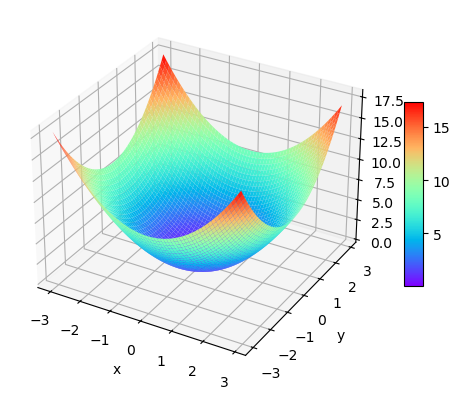

In [30]:
# 创建图形和 3D 坐标轴
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # 推荐的新写法

# 生成数据
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)  # 直接解包为 X 和 Y, 生成二维网格坐标矩阵，用于定义曲面的 (x, y) 平面基底。
# 输出：X 和 Y 是二维数组，形状为 (len(y), len(x))，表示所有 (x, y) 组合的网格点。
# X：每一行都是 x 的复制，形状为 (len(y), len(x))。
# Y：每一列都是 y 的复制，形状为 (len(y), len(x))。

Z = function_2([X, Y])    # 计算 Z 值

# 绘制曲面
surf = ax.plot_surface(X, Y, Z, cmap='rainbow', rstride=1, cstride=1)
# rstride=1, cstride=1：控制曲面网格的密度：
# rstride（row stride）：行方向步长（值越大网格越稀疏）。
# cstride（column stride）：列方向步长。

# 添加颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# surf：关联的曲面对象
# ax=ax：指定颜色条绑定的坐标轴。
# shrink=0.5：颜色条长度缩放因子（0.5 表示缩放到一半高度）。
# aspect=5：颜色条的宽高比（值越大越窄）。

# 设置坐标轴标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [41]:
def function_tmp1(x0):
    return x0*x0

In [42]:
numerical_diff(function_tmp1, 3.0)

6.000000000012662

In [43]:
def function_tmp2(x1):
    return x1*x1

In [44]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

##### **梯度**

In [45]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    return grad

In [46]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [47]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

##### **梯度下降法**

In [48]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [49]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [50]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [51]:
# 学习率过大的例子：lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [52]:
# 学习率过小的例子：lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [53]:
# 学习率精确的例子：lr=0.5
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.5, step_num=1)

array([1.89004368e-12, 4.40536496e-13])

##### **神经网络的梯度**
神经网络的梯度是指损失函数关于权重参数的梯度。对于一个形状为 2 × 3 的权重 $W$ 的神经网络，损失函数用 $L$ 表示。梯度可以用 $\frac{\partial L}{\partial W}$ 表示，它的元素由各个元素关于 $W$ 的偏导数构成。

$$ W =  \bigl( \begin{matrix}
w_{11}&w_{21}&w_{31}\\
w_{12}&w_{22}&w_{32}
\end{matrix}\bigr) $$

$$ \frac{\partial L}{\partial W} =  \bigl( \begin{matrix}
\frac{\partial L}{\partial w_{11}}&\frac{\partial L}{\partial w_{21}}&\frac{\partial L}{\partial w_{31}}\\
\frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}}
\end{matrix}\bigr) $$

In [55]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a - np.max(a)) # 溢出对策
    return exp_a / np.sum(exp_a)

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用标准正态分布进行初始化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss
    
    def numerical_gradient(self, W, x, t):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(W)
        
        it = np.nditer(W, flags=['multi_index'])
        # np.nditer：NumPy 的迭代器，用于高效遍历多维数组。
        # flags=['multi_index']：启用多维索引，it.multi_index 返回当前元素的索引（如 (i, j)）。
        while not it.finished:
            idx = it.multi_index # it.multi_index 返回当前迭代位置的多维索引
            tmp_val = W[idx]
            W[idx] = float(tmp_val) + h
            fxh1 = self.loss(x, t) # f(x+h)
            
            W[idx] = tmp_val - h 
            fxh2 = self.loss(x, t) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            W[idx] = tmp_val # 还原值
            it.iternext() # 移动到下一个元素：将迭代器的指针前进到数组的下一个位置，直到遍历完所有元素
            # 然后it.finished 变为 True。
            
        return grad

In [56]:
np.random.seed(1)
net = simpleNet()
print(net.W) # 权重参数

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]


In [58]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.00893546  0.41181302 -2.38828788]


In [59]:
np.argmax(p) 

np.int64(1)

In [60]:
t = np.array([0, 1, 0]) # 设定正确解标签
net.loss(x, t)

np.float64(0.5476574632667771)

In [62]:
dl = net.numerical_gradient(net.W, x, t)
print(dl)

[[ 0.23192042 -0.25301826  0.02109785]
 [ 0.34788063 -0.3795274   0.03164677]]


##### **两层神经网络的类**

In [85]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

def softmax(a):
    exp_a = np.exp(a - np.max(a)) # 溢出对策
    return exp_a / np.sum(exp_a)

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [86]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        z1 = sigmoid(np.dot(np.asarray(x), np.asarray(W1)) + np.asarray(b1)) # 回归, 激活
        y = softmax(np.dot(z1, W2) + b2) # 回归, softmax回归
        
        return y
    
    # x:输入数据, t:标签数据
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0]) # x.shape[0]可以换成len(t)
        return accuracy
    
    def numerical_gradient(self, W, x, t):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(W)

        it = np.nditer(W, flags=['multi_index'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = W[idx]
            W[idx] = float(tmp_val) + h
            fxh1 = self.loss(x, t) # f(x+h)
            
            W[idx] = tmp_val - h 
            fxh2 = self.loss(x, t) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            W[idx] = tmp_val # 还原值
            it.iternext()
            
        return grad

    # x:输入数据, t:监督数据
    def calc_grads(self, x, t):
        grads = {}
        grads['W1'] = self.numerical_gradient(self.params['W1'], x, t)
        grads['b1'] = self.numerical_gradient(self.params['b1'], x, t)
        grads['W2'] = self.numerical_gradient(self.params['W2'], x, t)
        grads['b2'] = self.numerical_gradient(self.params['b2'], x, t)
        
        return grads

In [87]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [88]:
x = np.random.rand(5, 784) # 伪输入数据（5笔）
t = np.random.rand(5, 10) # 伪正确解标签（5笔）

grads = net.calc_grads(x, t) # 计算梯度
print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


##### **实现mini-batch**

In [89]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [90]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

transform = transforms.ToTensor()
train_set = MNIST(root='./data', train=True, download=True, transform=transform)
test_set = MNIST(root='./data', train=False, download=True, transform=transform)

train_images = train_set.data        # 训练集图像 (torch.Tensor, 形状 [60000, 28, 28])
test_images = test_set.data          # 测试集图像 (形状 [10000, 28, 28])
train_labels = train_set.targets  # 训练集标签 (torch.Tensor 类型)
test_labels = test_set.targets    # 测试集标签

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
# 全部转换为二维向量

train_loss_list = []
# 超参数
iters_num = 20
train_size = train_images.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [91]:
for i in range(iters_num):
    # 随机取出 mini-batch 个数据
    batch_mask = np.random.choice(train_size, batch_size)
    # 从 [0, train_size-1] 范围内随机抽取 batch_size 个不重复的索引（默认无放回抽样）。
    # batch_mask 是一个包含随机索引的一维数组（形状为 (batch_size,)）。
    
    x_batch = train_images[batch_mask]
    t_batch = train_labels[batch_mask]
    
    # 计算梯度
    grad = network.calc_grads(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [93]:
train_loss_list, len(train_loss_list)

([np.float64(6.8645877429933035),
  np.float64(6.827164063570255),
  np.float64(6.794139919998529),
  np.float64(6.791351808290049),
  np.float64(6.782400042710158),
  np.float64(6.758038288870073),
  np.float64(6.755869365862813),
  np.float64(6.735913697838998),
  np.float64(6.67392217307638),
  np.float64(6.6060890005461985),
  np.float64(6.610903644272961),
  np.float64(6.595148111037316),
  np.float64(6.5600964733939815),
  np.float64(6.5562597773789255),
  np.float64(6.509095178523712),
  np.float64(6.518577167235764),
  np.float64(6.490113153430832),
  np.float64(6.379713761280261),
  np.float64(6.446390888657685),
  np.float64(6.426391553940684)],
 20)

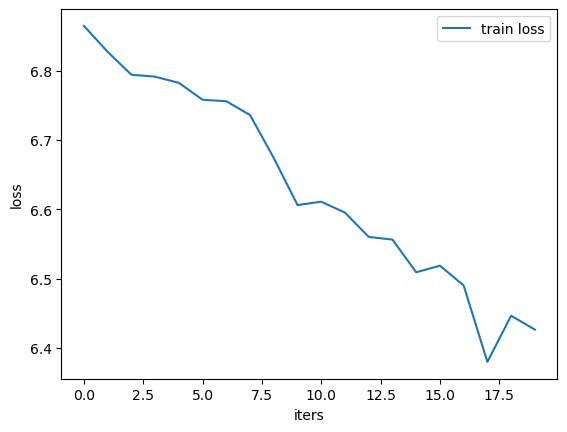

In [94]:
# 绘制图形
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iters")
plt.ylabel("loss")
plt.legend(loc='upper right')
plt.show()

##### **基于测试数据的评价(验证集)**

In [95]:
iters_num = 6000

train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = train_images[batch_mask]
    t_batch = train_labels[batch_mask]

#     # 计算梯度
#     grad = network.calc_grads(x_batch, t_batch)
    
#     # 更新参数
#     for key in ('W1', 'b1', 'W2', 'b2'):
#         network.params[key] -= learning_rate * grad[key]
    
#     # 记录学习过程
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)
#     # 计算每个epoch的识别精度
#     if i % iter_per_epoch == 0:
#         train_acc = network.accuracy(train_images, t_train)
#         test_acc = network.accuracy(train_labels, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))